In [5]:
import tensorflow as tf
from xlrd import open_workbook
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline


In [6]:
book = open_workbook('../data/fire_theft.xls')
sheet = book.sheet_by_index(0)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [7]:
rows = sheet.nrows
cols = sheet.ncols

In [8]:
data = np.asarray([sheet.row_values(i) for i in range(1,rows)])
print data.dtype
N = rows-1

float64


# Assemble the graph

In [13]:
X = tf.placeholder(tf.float32, name = "X")
Y = tf.placeholder(tf.float32, name = "Y")
w = tf.Variable(0.0, name = "w")
b = tf.Variable(0.0, name = "b")

Y_predicted = X*w + b
loss = tf.square(Y - Y_predicted, name = "loss")
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("./graphs/",sess.graph)
    
    X_data, Y_data = data.T[0], data.T[1]


    for iteration in xrange(200):
        total_loss = 0
        for x,y in data:
            _, l = sess.run([optimizer,loss], feed_dict = {X:x, Y:y})
            total_loss += l
        if iteration%10==0:
            print 'Loss in Epoch', iteration,":",total_loss/(N*1.0)
    
    w_val, b_val = sess.run([w,b])
    writer.close()
    
    
            
    

Loss in Epoch 0 : 2069.6319334
Loss in Epoch 10 : 1924.59308236
Loss in Epoch 20 : 1773.10248531
Loss in Epoch 30 : 1666.19353858
Loss in Epoch 40 : 1589.66805633
Loss in Epoch 50 : 1534.2117978
Loss in Epoch 60 : 1493.60021089
Loss in Epoch 70 : 1463.59965632
Loss in Epoch 80 : 1441.27821302
Loss in Epoch 90 : 1424.57482108
Loss in Epoch 100 : 1412.01807167
Loss in Epoch 110 : 1402.54462933
Loss in Epoch 120 : 1395.37728963
Loss in Epoch 130 : 1389.94267754
Loss in Epoch 140 : 1385.81505481
Loss in Epoch 150 : 1382.67520862
Loss in Epoch 160 : 1380.28415905
Loss in Epoch 170 : 1378.46195164
Loss in Epoch 180 : 1377.07407952
Loss in Epoch 190 : 1376.01427897


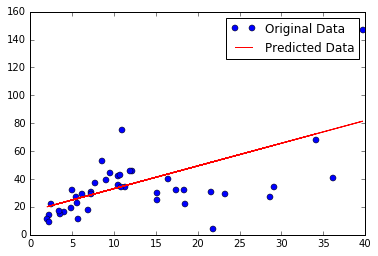

In [15]:
X, Y = data.T[0], data.T[1]
plt.plot(X,Y,'bo', label = "Original Data")
plt.plot(X, w_val*X+b_val, 'r', label = "Predicted Data")
plt.legend()
plt.show()